In [ ]:
import pandas as pd

df_chart = pd.read_csv("chart.csv")

print(df_chart.head())
print("\nColumns:", df_chart.columns.tolist())


  DateTime;"Users";"Average Users";"In-Game"
0                2004-01-13 00:00:00;84998;;
1                     2004-01-14 00:00:00;;;
2                     2004-01-15 00:00:00;;;
3                     2004-01-16 00:00:00;;;
4                     2004-01-17 00:00:00;;;

Columns: ['DateTime;"Users";"Average Users";"In-Game"']


<ipython-input-19-9c102b2b86ab>:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


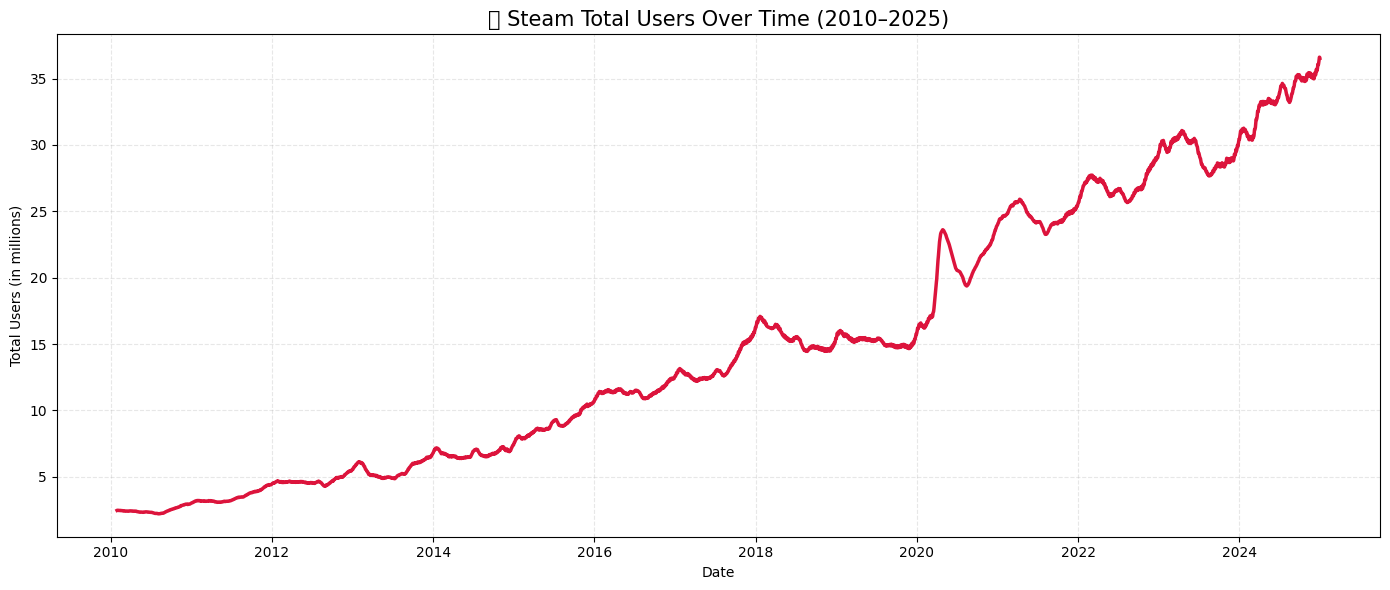

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with correct separator
df_chart = pd.read_csv("chart.csv", sep=";")

# Parse datetime and clean
df_chart["DateTime"] = pd.to_datetime(df_chart["DateTime"], errors="coerce")
df_chart["Users"] = pd.to_numeric(df_chart["Users"], errors="coerce")

# Filter for 2010 to 2025
df_chart = df_chart[(df_chart["DateTime"] >= "2010-01-01") & (df_chart["DateTime"] < "2025-01-01")]
df_chart = df_chart.dropna(subset=["Users"])

# Add rolling mean (smooth) and convert to millions
df_chart["Users_Million"] = df_chart["Users"] / 1_000_000
df_chart["Users_Smooth"] = df_chart["Users_Million"].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df_chart["DateTime"], df_chart["Users_Smooth"], color="crimson", linewidth=2.5)
plt.title("📈 Steam Total Users Over Time (2010–2025)", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Total Users (in millions)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-21-3dcbfb412144>:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


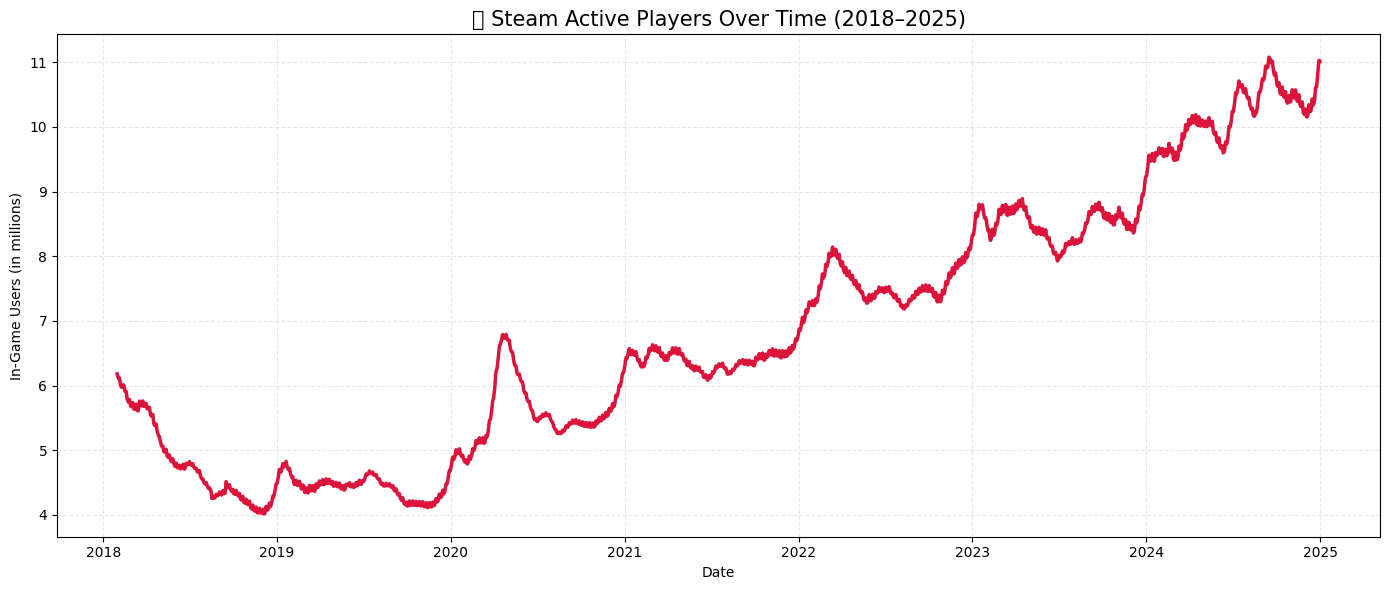

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse
df_chart = pd.read_csv("chart.csv", sep=";")
df_chart["DateTime"] = pd.to_datetime(df_chart["DateTime"], errors="coerce")
df_chart["In-Game"] = pd.to_numeric(df_chart["In-Game"], errors="coerce")

# Filter: 2018–2025
df_chart = df_chart[(df_chart["DateTime"] >= "2018-01-01") & (df_chart["DateTime"] < "2025-01-01")]
df_chart = df_chart.dropna(subset=["In-Game"])

# Smooth + convert to millions
df_chart["InGame_Million"] = df_chart["In-Game"] / 1_000_000
df_chart["InGame_Smooth"] = df_chart["InGame_Million"].rolling(window=30).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(df_chart["DateTime"], df_chart["InGame_Smooth"], color="crimson", linewidth=2.5)
plt.title("🔥 Steam Active Players Over Time (2018–2025)", fontsize=15)
plt.xlabel("Date")
plt.ylabel("In-Game Users (in millions)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("vgchartz-2024.csv")

print(df.columns.tolist())


['img', 'title', 'console', 'genre', 'publisher', 'developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date', 'last_update']


<ipython-input-27-2cc77784b1f0>:30: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


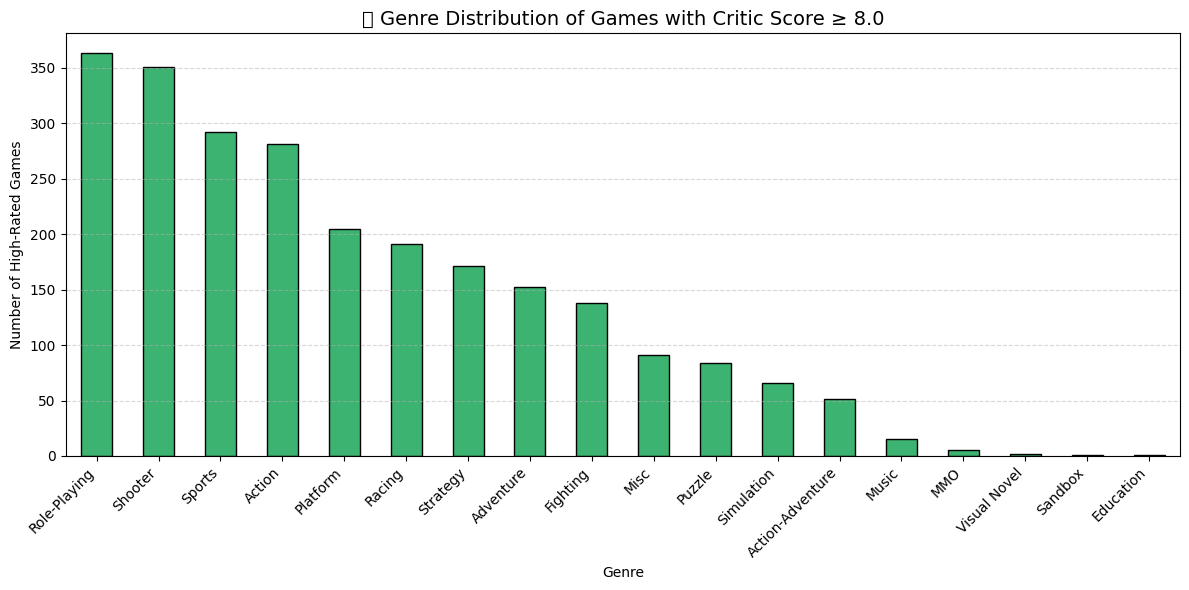

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("vgchartz-2024.csv")

# Convert critic_score to numeric (to handle non-numeric values like "tbd")
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")

# Drop rows with missing genre or critic_score
df = df.dropna(subset=["genre", "critic_score"])

# Filter high-rated games (assuming score is out of 10)
high_rated = df[df["critic_score"] >= 8.0]

# Check if data exists
if high_rated.empty:
    print("No games found with Critic Score ≥ 8.0 😥")
else:
    # Count genres
    genre_counts = high_rated["genre"].value_counts()

    # Plot
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind="bar", color="mediumseagreen", edgecolor="black")
    plt.title("🎯 Genre Distribution of Games with Critic Score ≥ 8.0", fontsize=14)
    plt.xlabel("Genre")
    plt.ylabel("Number of High-Rated Games")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# 1. Load dataset
df = pd.read_csv("vgchartz-2024.csv")

# 2. Convert columns to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# 3. Drop rows with missing values
df = df.dropna(subset=["genre", "critic_score", "total_sales"])

# 4. Filter: critic_score ≥ 8.0 and total_sales > 0
filtered_df = df[(df["critic_score"] >= 8.0) & (df["total_sales"] > 0)]

# 5. Group total_sales by genre and get average per game
genre_avg_sales = filtered_df.groupby("genre")["total_sales"].apply(list)

# 6. Perform ANOVA on genre averages
f_stat, p_value = f_oneway(*genre_avg_sales)

# 7. Output the results
print(f"F-statistic (on averages): {f_stat:.2f}")
print(f"P-value: {p_value:.10f}")

# 8. Interpret
if p_value < 0.05:
    print("✅ Reject H₀: Average total sales differ significantly between genres.")
else:
    print("⚠️ Fail to reject H₀: No significant difference in average sales between genres.")


F-statistic (on averages): 5.04
P-value: 0.0000000001
✅ Reject H₀: Average total sales differ significantly between genres.


In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv("vgchartz-2024.csv")

# 2. Convert critic_score and total_sales to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# 3. Drop missing values
df = df.dropna(subset=["critic_score", "total_sales", "genre"])

# 4. Filter for RPG games with Critic Score ≥ 8.0
rpg_high_rated = df[(df["genre"] == "Role-Playing") & (df["critic_score"] >= 8.0) & (df["total_sales"] > 0) ]

# 5. Compute total and average sales
total_sales_rpg = rpg_high_rated["total_sales"].sum()
count_rpg = rpg_high_rated.shape[0]
average_sales_rpg = total_sales_rpg / count_rpg if count_rpg > 0 else 0

# 6. Print result
print(f"🧙‍♂️ RPG games with Critic Score ≥ 8.0")
print(f"→ Total sales: {total_sales_rpg:.2f} million units")
print(f"→ Number of games: {count_rpg}")
print(f"→ Average sales per game: {average_sales_rpg:.2f} million units")


🧙‍♂️ RPG games with Critic Score ≥ 8.0
→ Total sales: 165.48 million units
→ Number of games: 161
→ Average sales per game: 1.03 million units


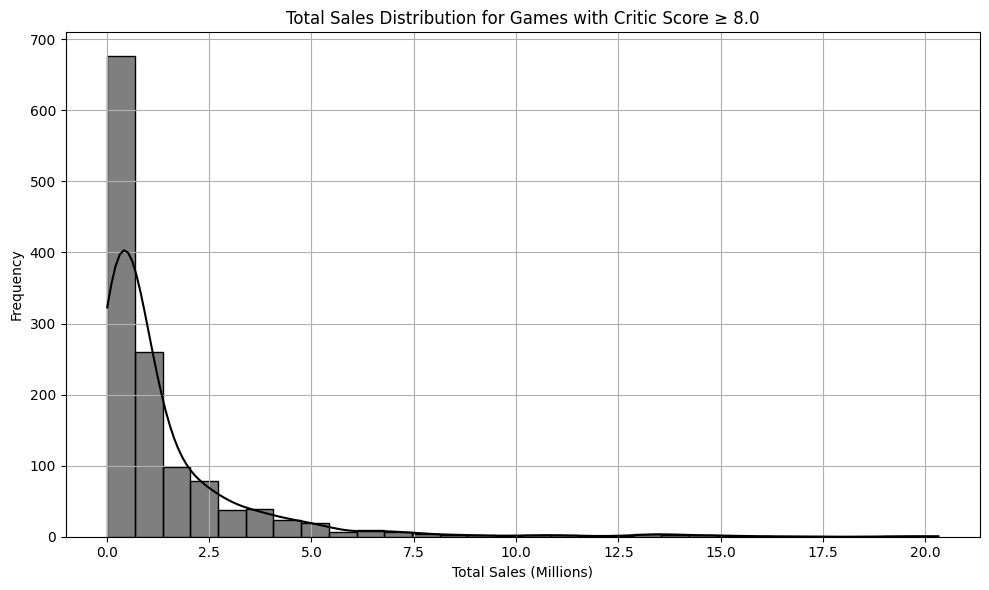

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("vgchartz-2024.csv")

# Convert to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["critic_score", "total_sales"])

# Filter high-rated games only
high_rated = df[(df["critic_score"] >= 8.0) & (df["total_sales"] > 0)]

# Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(high_rated["total_sales"], bins=30, kde=True, color='black')
plt.title("Total Sales Distribution for Games with Critic Score ≥ 8.0")
plt.xlabel("Total Sales (Millions)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-50-f53d47fc13eb>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_per_bin = df.groupby("score_bin")["total_sales"].mean().reset_index()
<ipython-input-50-f53d47fc13eb>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sales_per_bin, x="score_bin", y="total_sales", palette="viridis")


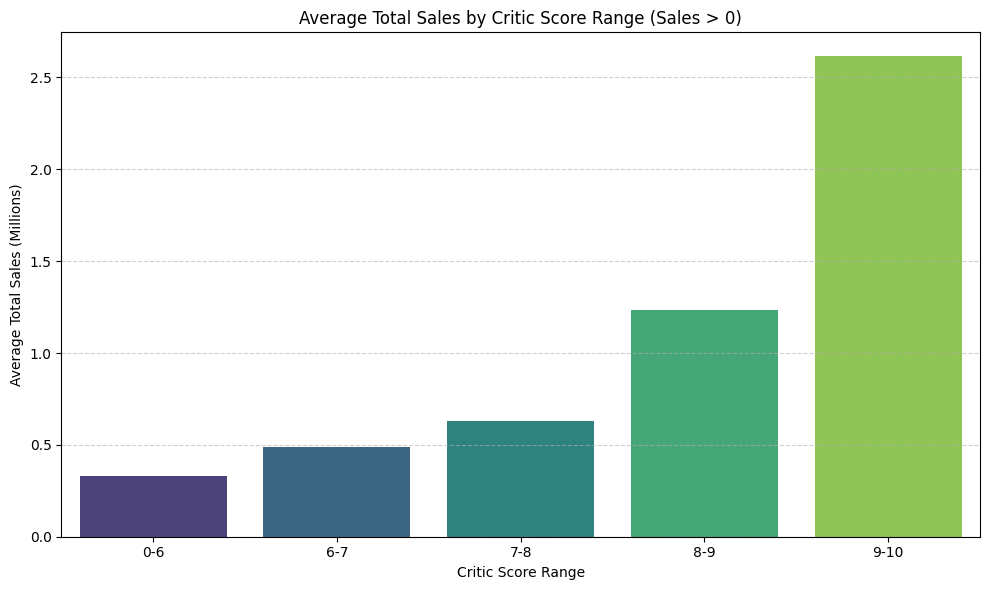

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("vgchartz-2024.csv")

# Convert relevant columns to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["critic_score", "total_sales"])

# Remove zero sales entries
df = df[df["total_sales"] > 0]

# Define critic score bins and labels
bins = [0, 6, 7, 8, 9, 10]
labels = ['0-6', '6-7', '7-8', '8-9', '9-10']

# Create binned critic score column
df["score_bin"] = pd.cut(df["critic_score"], bins=bins, labels=labels, include_lowest=True)

# Group by score_bin and compute average sales
avg_sales_per_bin = df.groupby("score_bin")["total_sales"].mean().reset_index()

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_per_bin, x="score_bin", y="total_sales", palette="viridis")
plt.title("Average Total Sales by Critic Score Range (Sales > 0)")
plt.xlabel("Critic Score Range")
plt.ylabel("Average Total Sales (Millions)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-54-f98f68513a21>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x="genre", y="total_sales", palette="Set3")


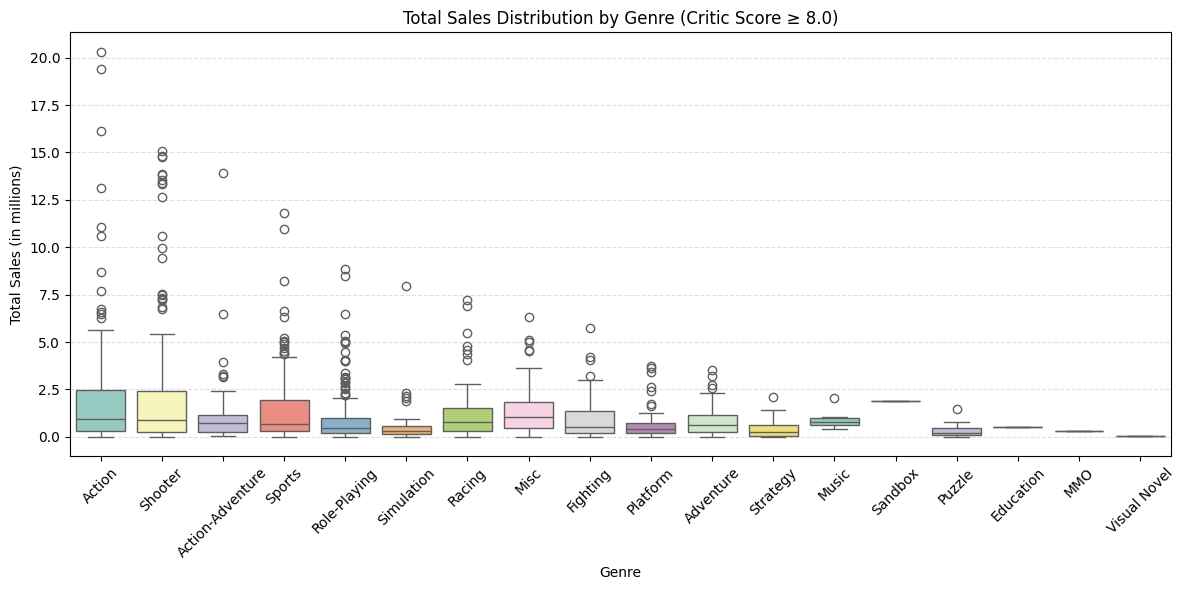

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("vgchartz-2024.csv")

# 2. Convert necessary columns
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# 3. Drop missing values
df = df.dropna(subset=["critic_score", "total_sales", "genre"])

# 4. Filter for games with critic_score >= 8.0 and total_sales > 0
filtered = df[(df["critic_score"] >= 8.0) & (df["total_sales"] > 0)]

# 5. Plot boxplot of total_sales by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x="genre", y="total_sales", palette="Set3")
plt.title("Total Sales Distribution by Genre (Critic Score ≥ 8.0)")
plt.xlabel("Genre")
plt.ylabel("Total Sales (in millions)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


<ipython-input-59-3b72d6ca01a7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg_sales, x="genre", y="total_sales", palette="coolwarm")


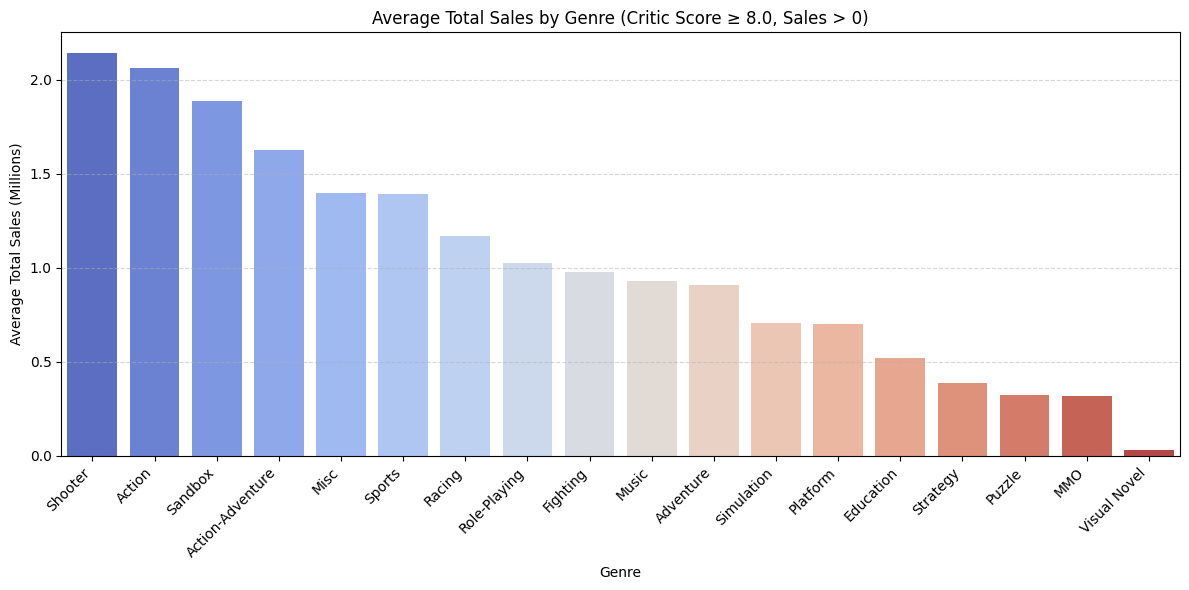

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("vgchartz-2024.csv")

# Convert critic_score and total_sales to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# Drop rows with missing or invalid data
df = df.dropna(subset=["critic_score", "total_sales", "genre"])

# Filter for high-rated games with sales > 0
filtered_df = df[(df["critic_score"] >= 8.0) & (df["total_sales"] > 0)]

# Group by genre and compute average sales
genre_avg_sales = filtered_df.groupby("genre")["total_sales"].mean().sort_values(ascending=False).reset_index()

# Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_avg_sales, x="genre", y="total_sales", palette="coolwarm")
plt.title("Average Total Sales by Genre (Critic Score ≥ 8.0, Sales > 0)")
plt.xlabel("Genre")
plt.ylabel("Average Total Sales (Millions)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


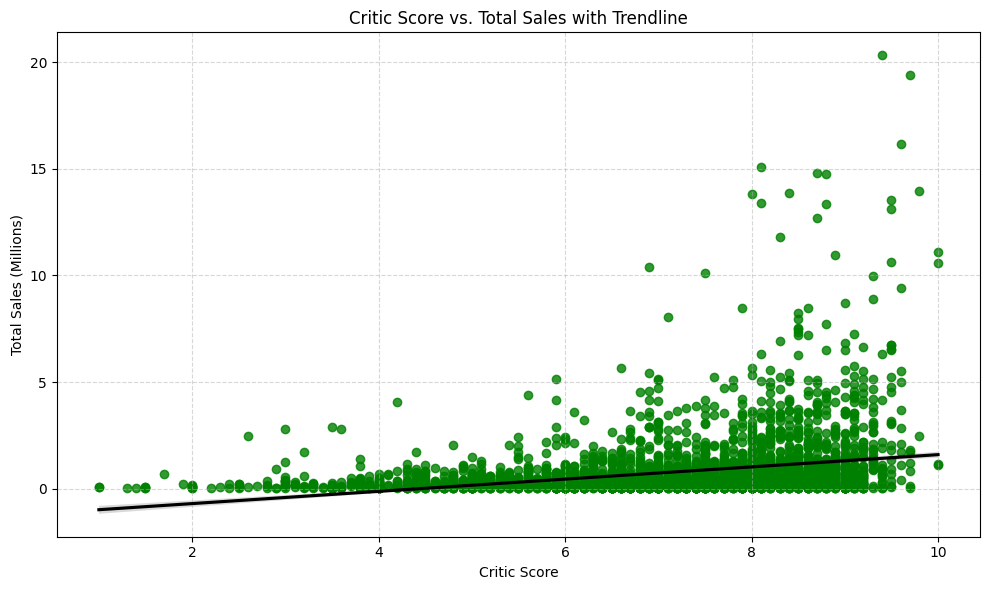

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("vgchartz-2024.csv")

# Convert relevant columns
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# Drop invalid rows
df = df.dropna(subset=["critic_score", "total_sales"])
df = df[df["total_sales"] > 0]

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="critic_score", y="total_sales", scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title("Critic Score vs. Total Sales with Trendline")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales (Millions)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


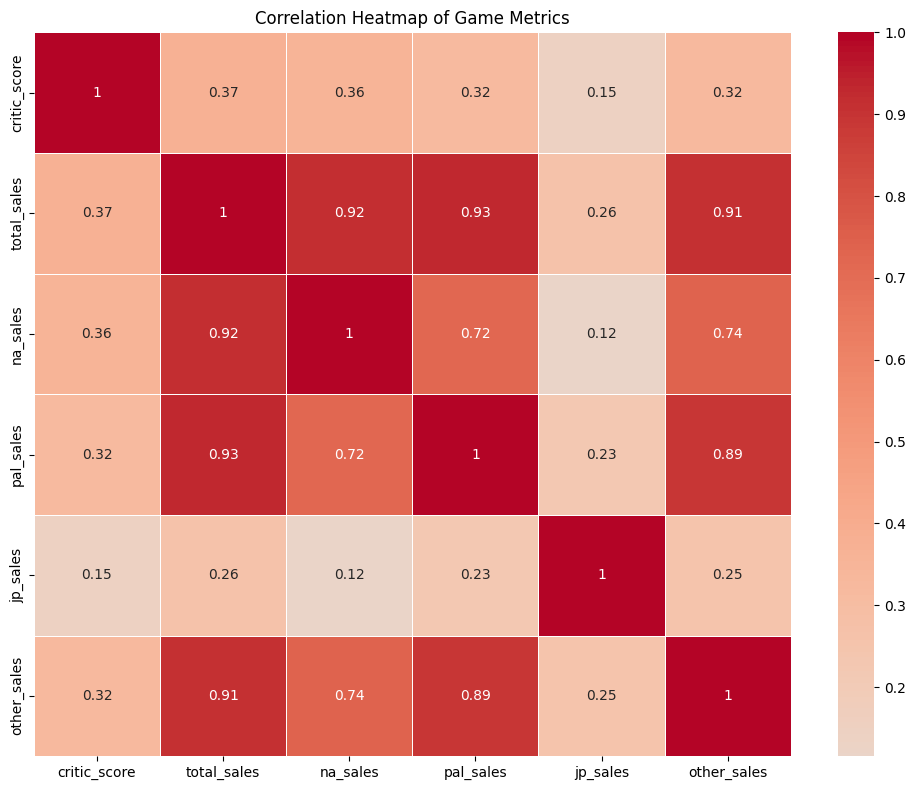

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("vgchartz-2024.csv")

# Convert necessary columns to numeric
numeric_cols = ["critic_score", "total_sales", "na_sales", "pal_sales", "jp_sales", "other_sales"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop missing values
df_cleaned = df[numeric_cols].dropna()

# Calculate correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Game Metrics")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset
df = pd.read_csv("vgchartz-2024.csv")

# 2. Convert columns to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# 3. Drop rows with missing or zero values
df = df.dropna(subset=["genre", "critic_score", "total_sales"])
df = df[df["total_sales"] > 0]

# 4. Group by genre
genre_stats = df.groupby("genre").agg(
    avg_score=("critic_score", "mean"),
    avg_sales=("total_sales", "mean"),
    count=("title", "count")
).reset_index()

# 5. Normalize avg_score and avg_sales
genre_stats["norm_score"] = (genre_stats["avg_score"] - genre_stats["avg_score"].min()) / (genre_stats["avg_score"].max() - genre_stats["avg_score"].min())
genre_stats["norm_sales"] = (genre_stats["avg_sales"] - genre_stats["avg_sales"].min()) / (genre_stats["avg_sales"].max() - genre_stats["avg_sales"].min())

# 6. Combine into a final score
genre_stats["final_score"] = (genre_stats["norm_score"] + genre_stats["norm_sales"]) / 2

# 7. Apply reliability factor using log scale
genre_stats["reliability_factor"] = np.log10(genre_stats["count"] + 1)
genre_stats["adjusted_score"] = genre_stats["final_score"] * genre_stats["reliability_factor"]

# 8. Sort by adjusted score
genre_stats_sorted = genre_stats.sort_values(by="adjusted_score", ascending=False)

# 9. Print or export
print(genre_stats_sorted[["genre", "avg_score", "avg_sales", "count", "adjusted_score"]])


               genre  avg_score  avg_sales  count  adjusted_score
15           Shooter   7.222691   1.224337    498        1.531327
17            Sports   7.438931   0.925821    524        1.400974
0             Action   6.700000   0.812900    707        1.111354
12            Racing   7.172340   0.766748    329        1.103346
13      Role-Playing   7.383857   0.570179    446        1.092909
1   Action-Adventure   7.472368   1.004342     76        1.019514
5           Fighting   7.258065   0.638203    217        0.969359
7               Misc   6.812500   0.736830    224        0.903046
2          Adventure   6.999087   0.600731    219        0.869633
10          Platform   6.875920   0.522107    299        0.828171
16        Simulation   6.835172   0.686414    145        0.807893
18          Strategy   7.348701   0.304026    154        0.736646
8              Music   7.843750   0.836250     16        0.667956
11            Puzzle   7.107477   0.293645    107        0.615314
14        

<ipython-input-64-a7fdbdfc0108>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats_sorted, x="genre", y="expected_total_sales", palette="viridis")


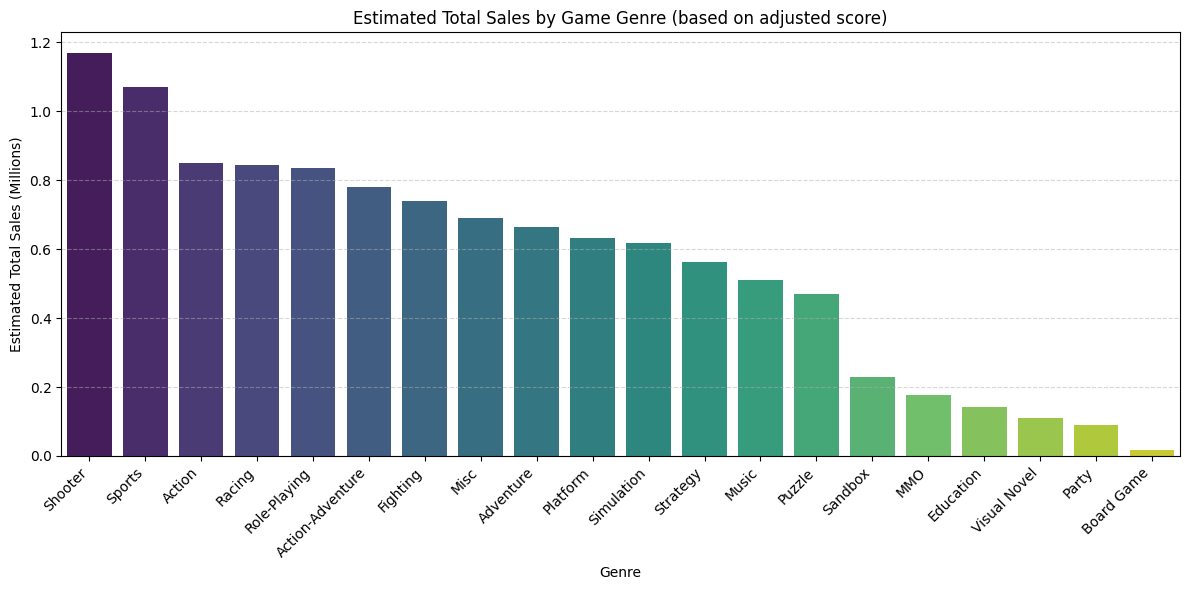

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("vgchartz-2024.csv")

# 2. Convert to numeric
df["critic_score"] = pd.to_numeric(df["critic_score"], errors="coerce")
df["total_sales"] = pd.to_numeric(df["total_sales"], errors="coerce")

# 3. Drop rows with missing or zero values
df = df.dropna(subset=["genre", "critic_score", "total_sales"])
df = df[df["total_sales"] > 0]

# 4. Group and calculate metrics
genre_stats = df.groupby("genre").agg(
    avg_score=("critic_score", "mean"),
    avg_sales=("total_sales", "mean"),
    count=("title", "count")
).reset_index()

# 5. Normalize
genre_stats["norm_score"] = (genre_stats["avg_score"] - genre_stats["avg_score"].min()) / (genre_stats["avg_score"].max() - genre_stats["avg_score"].min())
genre_stats["norm_sales"] = (genre_stats["avg_sales"] - genre_stats["avg_sales"].min()) / (genre_stats["avg_sales"].max() - genre_stats["avg_sales"].min())

# 6. Final score and reliability
genre_stats["final_score"] = (genre_stats["norm_score"] + genre_stats["norm_sales"]) / 2
genre_stats["reliability_factor"] = np.log10(genre_stats["count"] + 1)
genre_stats["adjusted_score"] = genre_stats["final_score"] * genre_stats["reliability_factor"]

# 7. Estimate expected total sales using baseline
baseline_sales = df["total_sales"].mean()
genre_stats["expected_total_sales"] = genre_stats["adjusted_score"] * baseline_sales

# 8. Sort and plot
genre_stats_sorted = genre_stats.sort_values(by="expected_total_sales", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats_sorted, x="genre", y="expected_total_sales", palette="viridis")
plt.title("Estimated Total Sales by Game Genre (based on adjusted score)")
plt.xlabel("Genre")
plt.ylabel("Estimated Total Sales (Millions)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


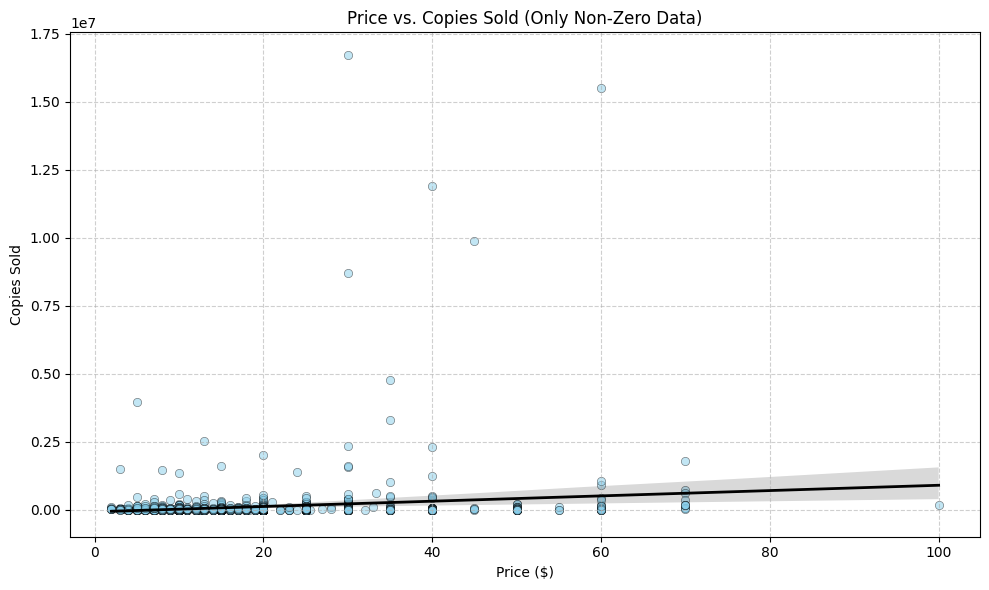

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Steam_2024_bestRevenue_1500.csv")

# Convert necessary columns to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["copiesSold"] = pd.to_numeric(df["copiesSold"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["price", "copiesSold"])

# Filter out rows where price or copiesSold is zero
df_filtered = df[(df["price"] > 0) & (df["copiesSold"] > 0)]

# Plot: Scatter + Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x="price", y="copiesSold", alpha=0.5, color="skyblue", edgecolor="black")
sns.regplot(data=df_filtered, x="price", y="copiesSold", scatter=False, color="black", line_kws={"linewidth": 2})

plt.title("Price vs. Copies Sold (Only Non-Zero Data)")
plt.xlabel("Price ($)")
plt.ylabel("Copies Sold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from scipy.stats import pearsonr

# Load and prepare the dataset
df = pd.read_csv("Steam_2024_bestRevenue_1500.csv")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["copiesSold"] = pd.to_numeric(df["copiesSold"], errors="coerce")

# Drop missing values
df = df.dropna(subset=["price", "copiesSold"])

# Filter out entries where price or copiesSold is zero
df_filtered = df[(df["price"] > 0) & (df["copiesSold"] > 0)]

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(df_filtered["price"], df_filtered["copiesSold"])

# Print results
print(f"Pearson correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Reject H₀: Price significantly affects copies sold.")
else:
    print("Fail to reject H₀: No significant relationship between price and copies sold.")


Pearson correlation coefficient: 0.1479
P-value: 0.0000000226
Reject H₀: Price significantly affects copies sold.
